In [4]:
#-*- coding: utf8 -*-
from IPython.display import Image
from IPython.core.display import HTML 

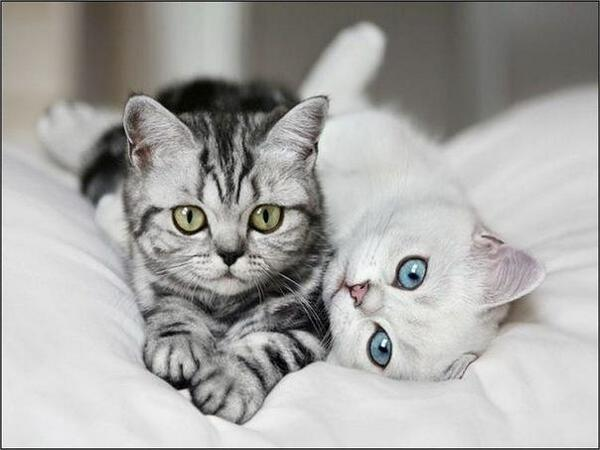

In [6]:
PATH = "C:/Users/sunhuanying/Desktop/CSRC/书籍/figure/"
Image(filename = PATH +"mao.jpg", width=200, height=200)

猫的图片需要Cell type 为code.

<center class="half">
<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1533634141235&di=b91c35f025b9fced743c6f158bb2c6bc&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fimage%2Fpic%2Fitem%2Ff9198618367adab4b025268587d4b31c8601e47b.jpg" width="200"><img src="https://ss0.baidu.com/94o3dSag_xI4khGko9WTAnF6hhy/image/h%3D300/sign=214b24506081800a71e58f0e813433d6/d50735fae6cd7b896e42e75c032442a7d8330ec7.jpg" width="200/">
</center>
<caption><center> **Figure 2**: 单列显示</center></caption>

<table>
<td> 
<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1533634141235&di=b91c35f025b9fced743c6f158bb2c6bc&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fimage%2Fpic%2Fitem%2Ff9198618367adab4b025268587d4b31c8601e47b.jpg" style="width:200;height:200px;"> <br>
</td> 
<td> 
<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1533634141235&di=b91c35f025b9fced743c6f158bb2c6bc&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fimage%2Fpic%2Fitem%2Ff9198618367adab4b025268587d4b31c8601e47b.jpg" style="width:200;height:200px;"> <br>
</td> 
</table>
<caption><center> **Figure 3**: 并排显示</center></caption>

# 公式输入示例：（换行，两个以上空格加回车或者）  
$H=\omega_c a^\dagger a$    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## 二级标题

In [ ]:
N = 12
wr = 2.0 * 2      # resonator frequency
wq = 3.0 * 2       # qubit frequency
chi = 0.025 * 2   # parameter in the dispersive hamiltonian
delta = abs(wr - wq)        # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

In [ ]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

In [ ]:
I = tensor(qeye(N), qeye(2))
# dispersive hamiltonian
H = wr * (a.dag() * a + I/2.0) - (wq / 2.0) * sz + g* (a.dag()+ a) * sx

#psi0 = tensor(coherent(N, sqrt(6)), (basis(2,0)+basis(2,1)).unit())
#psi0 = tensor(thermal_dm(N, 3), ket2dm(basis(2,0)+basis(2,1))).unit()
psi0 = tensor(coherent(N, np.sqrt(4)), (basis(2,0)+basis(2,1)).unit())


tlist = np.linspace(0, 1000, 10001)
corr_vec = correlation(H, psi0, None, tlist, [], a.dag(), a)
w, S = spectrum_correlation_fft(tlist, corr_vec)

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w / 2, abs(S))
ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_xlim(wr/(2)-.5, wr/(2)+.5);